In [10]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from Functions.Preprocess import events_to_df_vert3
data1_path = "Data/from_cluster/26.9.20/bb1.root.RaveTest_cluster.0.7.txt"
data2_path = "Data/from_cluster/26.9.20/dark1.root.RaveTest_cluster.0.7.txt"

max_ev = 100000
n_constits = 5
trunc = False

B = events_to_df_vert3(data1_path, label=0, max_ev=max_ev, n_constits=n_constits, trunc=trunc)
S = events_to_df_vert3(data2_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=trunc)

Wall time: 8.18 s


In [143]:
B.head()

,Event,MET,jet1_PT,jet1_Eta,jet1_Phi,jet2_PT,jet2_Eta,jet2_Phi,n_vert,jet_association,...,vert_Phi,deltaR1,deltaR2,vert_chisq,label,n_verts,n_associated_verts,n_non_associated_verts,SV_mult,SV_disp
0,1,21.15690,207.692,-2.343440,0.260427,139.019,-1.659890,-2.891270,"[1.0, 2.0, 3.0, 4.0]","[-2.0, -2.0, -2.0, 2.0]",...,"[0.827123, 1.5015, -0.776767, -2.92422]","[1.38648, 2.30168, 3.50196, 3.18404]","[2.62996, 2.269, 3.39905, 0.059351]","[39.9983, 0.0400445, 3.66216, 1.3079]",0,4,1,2,2.0,0.264445
1,2,30.35820,161.249,0.858165,-2.947290,141.895,0.889747,0.256459,"[1.0, 3.0, 4.0, 2.0]","[-2.0, -2.0, 1.0, 2.0]",...,"[-0.105457, -0.431483, -2.97139, 0.0811961]","[3.38463, 2.53278, 0.02587, 3.0285]","[1.90467, 0.760518, 3.05561, 0.179336]","[52.1192, 5.46842, 0.464983, 1.99328]",0,4,2,1,3.0,0.196843
2,3,4.49044,157.091,-1.156370,-2.562820,117.215,-2.156310,0.671204,"[2.0, 1.0]","[-2.0, -2.0]",...,"[1.23267, 1.83799]","[3.73721, 2.59798]","[3.83024, 3.02464]","[0.0526839, 61.3276]",0,2,0,1,40.0,0.025358
3,4,15.59470,167.435,0.540816,-1.392400,153.095,-0.227913,1.979330,"[1.0, 2.0]","[1.0, 2.0]",...,"[-1.49254, 2.05341]","[0.332033, 2.93211]","[2.84745, 0.0797078]","[95.7688, 11.832]",0,2,1,0,6.0,4.042930
4,5,10.43410,124.060,-1.692410,-2.964060,111.114,-1.432700,0.347524,[1.0],[-2.0],...,[0.706007],[2.88532],[1.02821],[20.3588],0,1,0,0,NaN,NaN


## Sample event plot

In [ ]:
jet_1_track = 
jet_2_track = 

In [ ]:
ev_num = 1
event = B[ev_num][['jet1_Px', 'jet1_Py', 'jet1_Pz', 'jet2_Px', 'jet2_Py', 'jet2_Pz', 'vert_x', 'vert_y', 'vert_z', 'track_Px', 'track_Py', 'track_Pz']]
# Plot vertices
# Plot leading jet cones
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

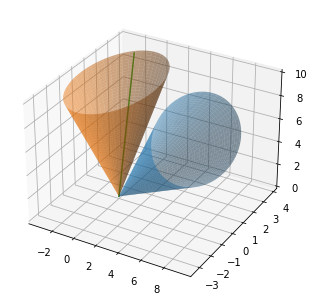

In [156]:
from scipy.spatial.transform import Rotation as R

r0 = np.array([0, 0, 0])
p = np.array([-2, 3, 7])
theta_open = np.pi/10
theta_dir_cone1 = np.pi/4
phi_dir_cone1 = 0
theta_dir_cone2 = 0
phi_dir_cone2 = 0

fig = plt.figure()
ax = Axes3D(fig)

### plot jet cones ###
# Plot cone
z = np.linspace(0, 10, 100)
phi = np.linspace(0, 2*np.pi, 100)
PHI, Z = np.meshgrid(phi, z)
X = Z*np.tan(theta_open) * np.cos(PHI)
Y = Z*np.tan(theta_open) * np.sin(PHI)
# Plot j1 cone
# Translate and rotate j1
r1 = R.from_rotvec(theta_dir_cone1*np.array([0, 1,0])).as_matrix()
r2 = R.from_rotvec(phi_dir_cone1*np.array([0, 0, 1])).as_matrix()
r = np.matmul(r2, r1)
cone = np.array([X.flatten(), Y.flatten(), Z.flatten()])
transformed_cone = np.matmul(r, cone)      
X_prime = transformed_cone[0, :].reshape(len(z), len(phi))
Y_prime = transformed_cone[1, :].reshape(len(z), len(phi))
Z_prime = transformed_cone[2, :].reshape(len(z), len(phi))
# Plot j1
ax.plot_surface(X_prime, Y_prime, Z_prime, alpha=0.5)
# Plot j2 cone
# Translate and rotate j2
r1 = R.from_rotvec(theta_dir_cone2*np.array([0, 1,0])).as_matrix()
r2 = R.from_rotvec(phi_dir_cone2*np.array([0, 0, 1])).as_matrix()
r = np.matmul(r2, r1)
cone = np.array([X.flatten(), Y.flatten(), Z.flatten()])
transformed_cone = np.matmul(r, cone)      
X_prime = transformed_cone[0, :].reshape(len(z), len(phi))
Y_prime = transformed_cone[1, :].reshape(len(z), len(phi))
Z_prime = transformed_cone[2, :].reshape(len(z), len(phi))
# Plot j2
ax.plot_surface(X_prime, Y_prime, Z_prime, alpha=0.5)

def track_line(r0, p, l=10, res=100):
    t = np.linspace(0, l, res*l)
    return  r0 + np.outer(t, p/np.linalg.norm(p))
track = plot_line(r0, p)
ax.plot(track[:, 0], track[:, 1], track[:, 2])

plt.gcf().set_size_inches(10, 10)

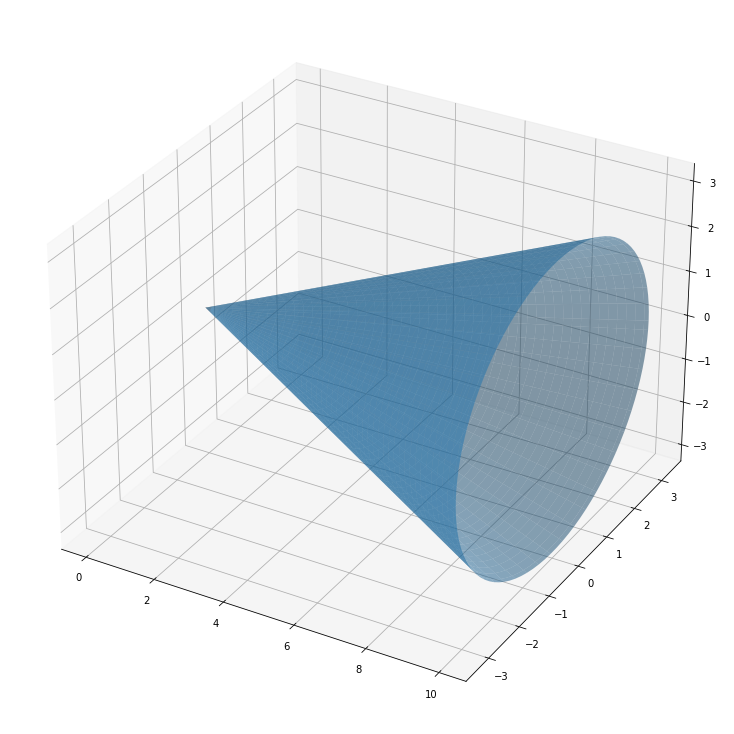

In [140]:


theta_open = np.pi/10
theta_dir_cone = np.pi/2
phi_dir_cone = np.pi/2

# Plot cone
z = np.linspace(0, 10, 100)
phi = np.linspace(0, 2*np.pi, 100)
PHI, Z = np.meshgrid(phi, z)
X = Z*np.tan(theta_open) * np.cos(PHI)
Y = Z*np.tan(theta_open) * np.sin(PHI)

# Translate and rotate
r1 = R.from_rotvec(theta_dir_cone*np.array([0, 1,0])).as_matrix()
r2 = R.from_rotvec(phi_dir_cone*np.array([1, 0, 0])).as_matrix()
r = np.matmul(r2, r1)
cone = np.array([X.flatten(), Y.flatten(), Z.flatten()])
transformed_cone = np.matmul(r, cone)      
X_prime = transformed_cone[0, :].reshape(len(z), len(phi))
Y_prime = transformed_cone[1, :].reshape(len(z), len(phi))
Z_prime = transformed_cone[2, :].reshape(len(z), len(phi))

# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X_prime, Y_prime, Z_prime, alpha=0.5)
plt.gcf().set_size_inches(10, 10)

In [132]:
X_prime = transformed_cone[0, :].reshape(len(z), len(phi))
Y_prime = transformed_cone[1, :].reshape(len(z), len(phi))
Z_prime = transformed_cone[2, :].reshape(len(z), len(phi))
ax.plot_surface(X_prime, Y_prime, Z_prime)

In [125]:
transformed_cone.shape

(3, 1000)

In [127]:
cone.shape

(3, 1000)

In [128]:
X.shape

(100, 10)

In [119]:
ax.plot_surface(X, Y, Z)

ValueError: Argument Z must be 2-dimensional.

In [91]:
cone.shape

(3, 10000)

In [63]:
x = Z*np.tan(theta) * np.cos(PHI)

In [64]:
x.shape

(100, 100)

In [56]:
z.shape

(100, 100)

In [46]:
plot_line(r0, p)[:,1].shape

(1000,)

In [34]:
B.head()

,Event,MET,jet1_PT,jet1_Eta,jet1_Phi,jet2_PT,jet2_Eta,jet2_Phi,n_vert,jet_association,...,vert_Phi,deltaR1,deltaR2,vert_chisq,label,n_verts,n_associated_verts,n_non_associated_verts,SV_mult,SV_disp
0,1,21.15690,207.692,-2.343440,0.260427,139.019,-1.659890,-2.891270,"[1.0, 2.0, 3.0, 4.0]","[-2.0, -2.0, -2.0, 2.0]",...,"[0.827123, 1.5015, -0.776767, -2.92422]","[1.38648, 2.30168, 3.50196, 3.18404]","[2.62996, 2.269, 3.39905, 0.059351]","[39.9983, 0.0400445, 3.66216, 1.3079]",0,4,1,3,2.0,0.264445
1,2,30.35820,161.249,0.858165,-2.947290,141.895,0.889747,0.256459,"[1.0, 3.0, 4.0, 2.0]","[-2.0, -2.0, 1.0, 2.0]",...,"[-0.105457, -0.431483, -2.97139, 0.0811961]","[3.38463, 2.53278, 0.02587, 3.0285]","[1.90467, 0.760518, 3.05561, 0.179336]","[52.1192, 5.46842, 0.464983, 1.99328]",0,4,2,2,3.0,0.196843
2,3,4.49044,157.091,-1.156370,-2.562820,117.215,-2.156310,0.671204,"[2.0, 1.0]","[-2.0, -2.0]",...,"[1.23267, 1.83799]","[3.73721, 2.59798]","[3.83024, 3.02464]","[0.0526839, 61.3276]",0,2,0,2,40.0,0.025358
3,4,15.59470,167.435,0.540816,-1.392400,153.095,-0.227913,1.979330,"[1.0, 2.0]","[1.0, 2.0]",...,"[-1.49254, 2.05341]","[0.332033, 2.93211]","[2.84745, 0.0797078]","[95.7688, 11.832]",0,2,2,0,6.0,4.042930
4,5,10.43410,124.060,-1.692410,-2.964060,111.114,-1.432700,0.347524,[1.0],[-2.0],...,[0.706007],[2.88532],[1.02821],[20.3588],0,1,0,1,NaN,NaN


In [12]:
def feat_hist(df, feat, df_name, lim=None):
    if not lim:
        lim = max(df[feat])
    plt.figure()
    df[feat].hist(bins=np.arange(-0.5, lim, 1))   
    plt.xticks(np.arange(0,lim, 1))
    plt.title(df_name + " - " + feat)
    plt.gcf().set_size_inches(15, 10)
def vert_hists(df, df_name):
    df["n_verts"] = df.n_vert.map(lambda x: len(x))
    df["n_associated_verts"] = df.jet_association.map(lambda x: 0 if len(x)<2 else sum(x[1:]>0))
    df["n_non_associated_verts"] = df.jet_association.map(lambda x: 0 if len(x)<2 else sum(x[1:]<0))
    df["SV_mult"] = df.vert_mult.map(lambda x: np.nan if len(x)<2 else x[1])
    df["SV_disp"] = df.vert_D0.map(lambda x: np.nan if len(x)<2 else x[1])
    print(len(df[df.n_associated_verts>0])/len(df))
    feat_hist(df, "n_verts", df_name)
    feat_hist(df, "n_associated_verts", df_name)
    feat_hist(df, "n_non_associated_verts", df_name)
    feat_hist(df, "SV_mult", df_name, lim=60)
    plt.figure()
    df.SV_disp.hist(bins=np.arange(0,3, 0.05))
    plt.title(df_name + " - " + "SV_disp")
    plt.gcf().set_size_inches(15, 10)

0.7325581395348837


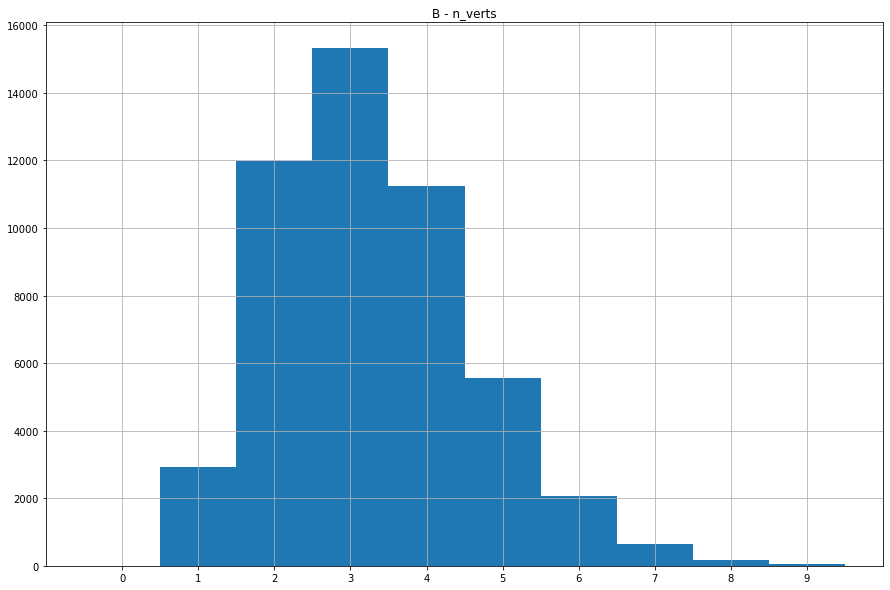

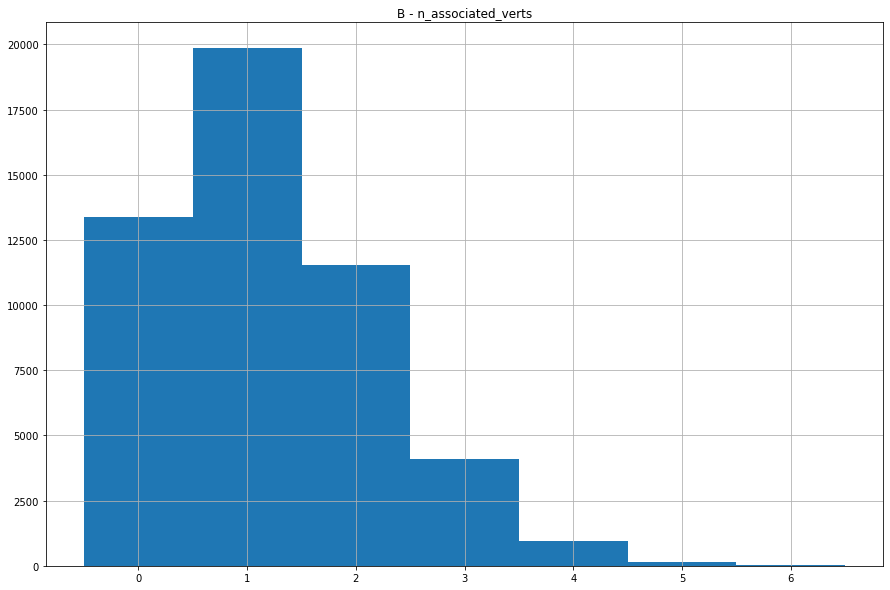

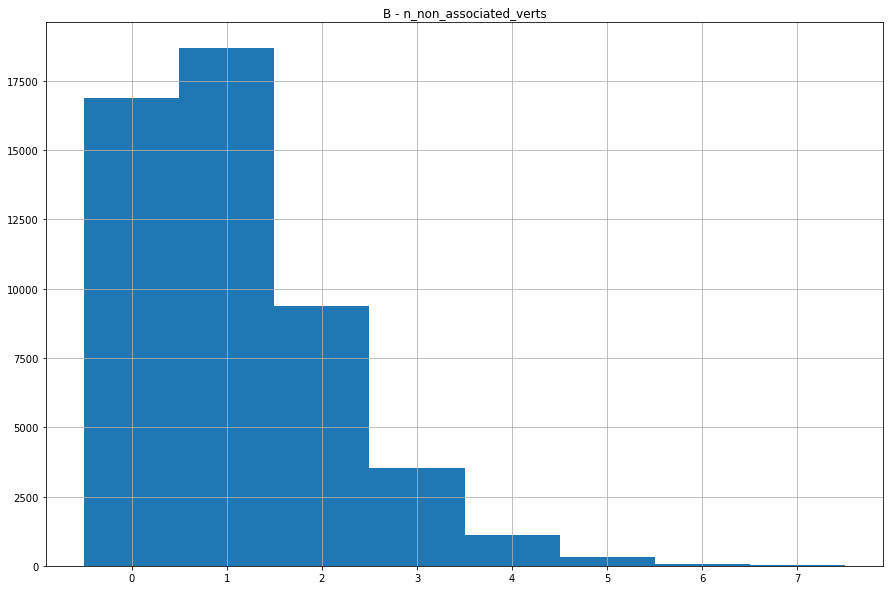

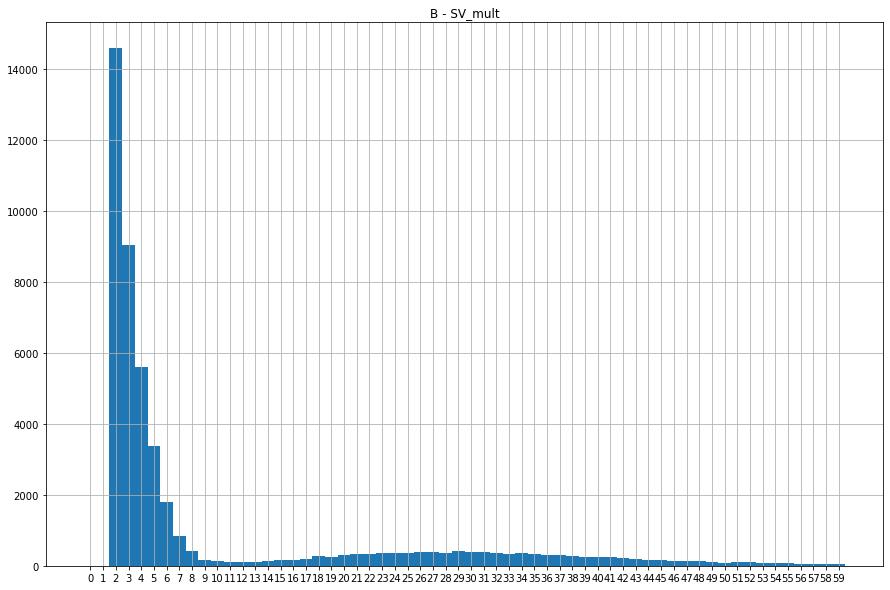

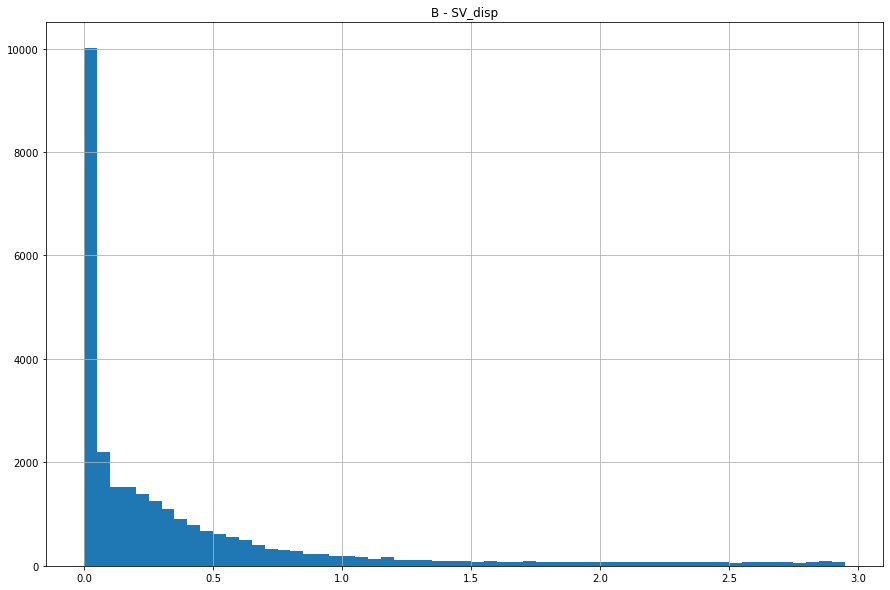

In [13]:
vert_hists(B, "B")

0.9749984999099947


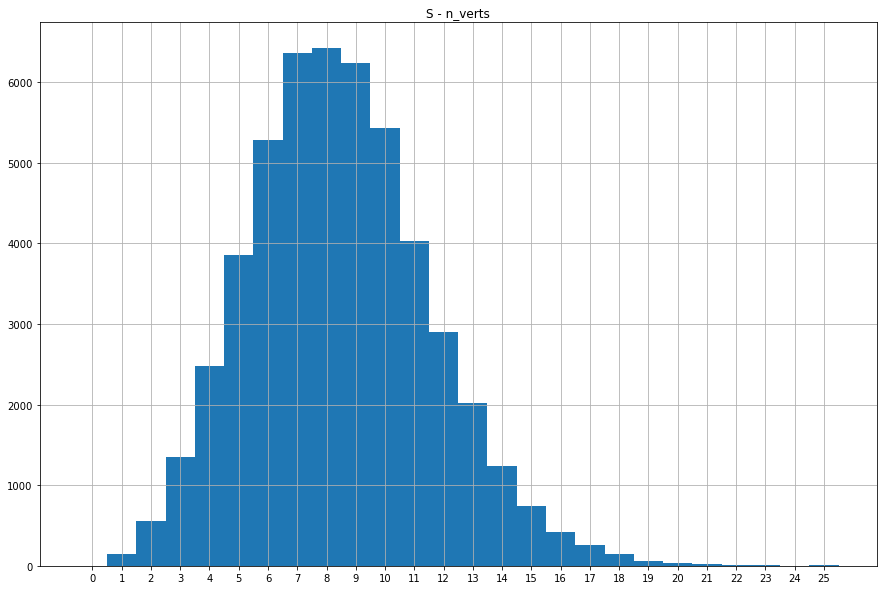

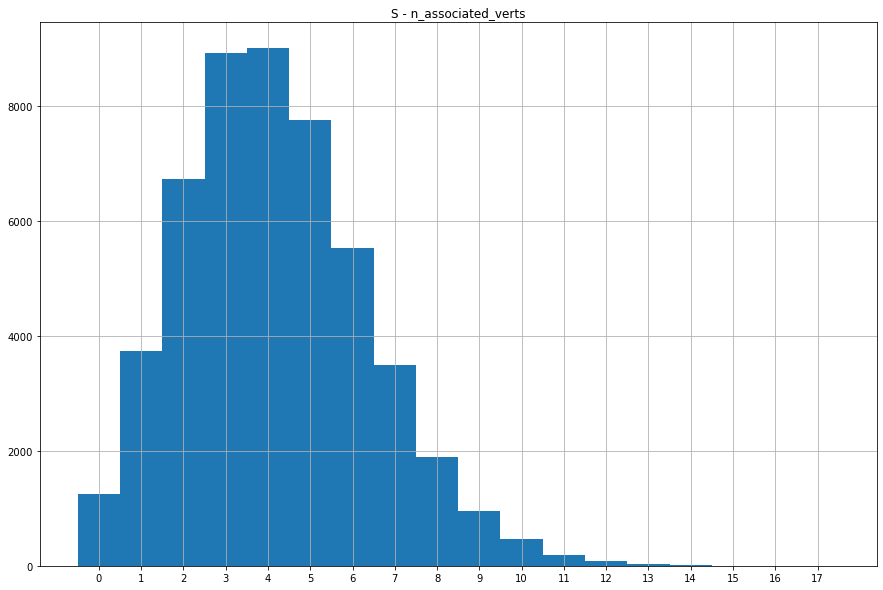

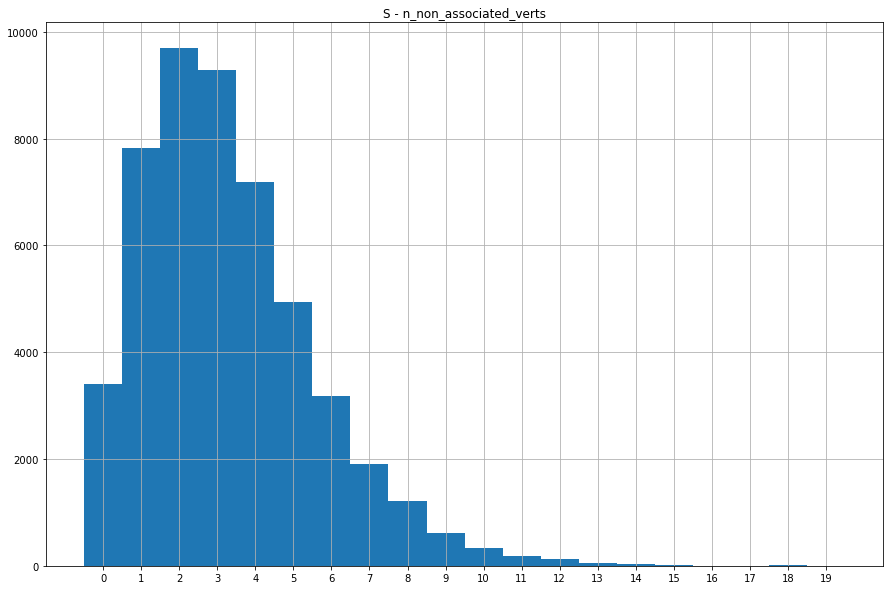

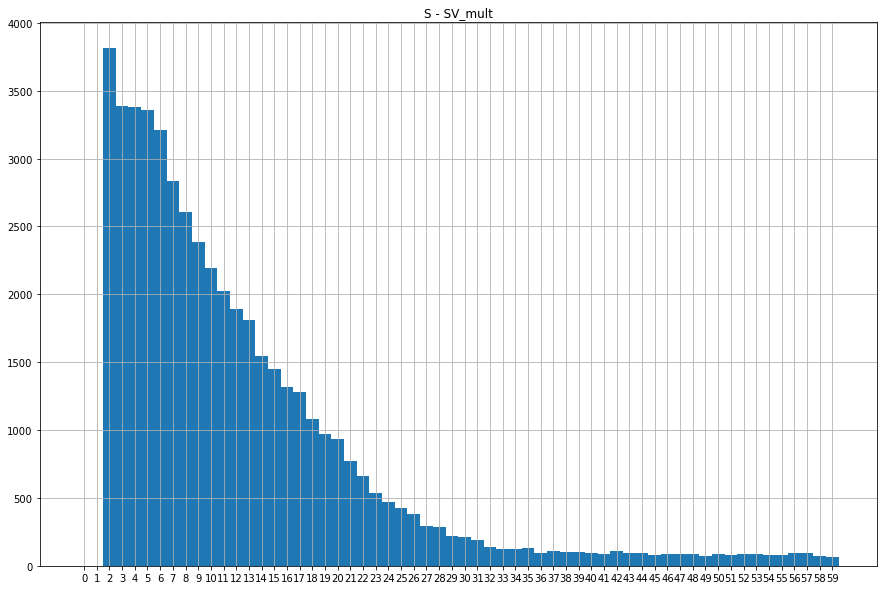

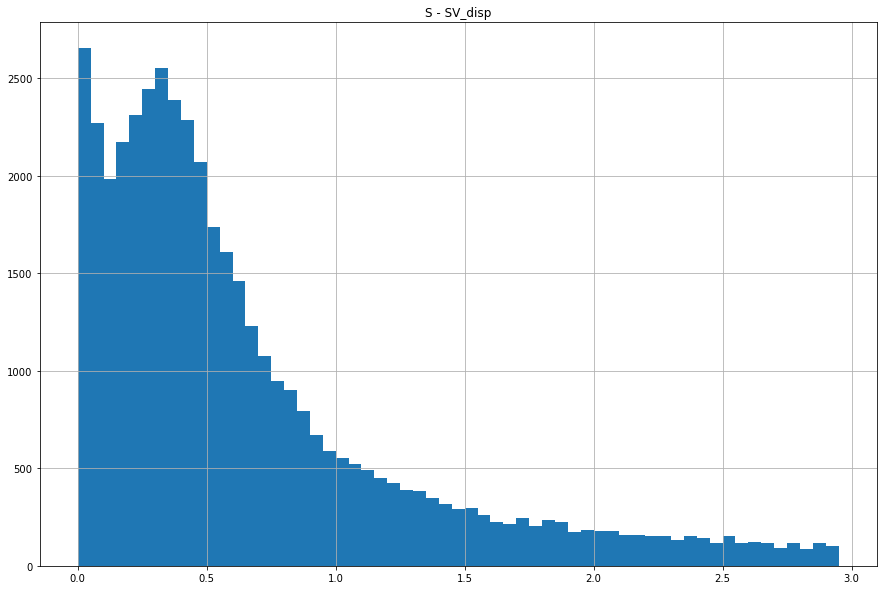

In [75]:
vert_hists(S, "S")